# Create heuristic model (avg pixel movement)

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from vid_utils import Video_Utils

In [3]:
VIDEO_DIR = '../../video/raw'
LABEL_DIR = '../../video/labels'

In [4]:
possible_vids = set(os.listdir(VIDEO_DIR))

possible_labels = set(os.listdir(LABEL_DIR))

possible_vids, possible_labels

for vid in possible_vids:
    if (vid + '.csv') in possible_labels:
#         usable_vids.append(vid)
        print('{} is good to use'.format(vid))
    
possible_vids, possible_labels

VID_20180325_144520.mp4 is good to use


({'VID_20180325_143338b.mp4', 'VID_20180325_144520.mp4'},
 {'VID_20180325_143338.mp4.csv', 'VID_20180325_144520.mp4.csv'})

In [5]:
x, y = Video_Utils.get_transformed_data(crop_height=[150,350],
                                        video_dir=VIDEO_DIR, 
                                        label_dir=LABEL_DIR)

VID_20180325_144520.mp4 is good to use
fetching ../../video/labels/VID_20180325_144520.mp4.csv
loaded video sized 13.008729744gb
cropping...
resizing...
compressed 0 images
compressed 200 images
compressed 400 images
compressed 600 images
compressed 800 images
compressed 1000 images
compressed 1200 images
compressed 1400 images
compressed 1600 images
compressed 1800 images
compressed 2000 images
compressed 2200 images
compressed 2400 images
compressed 2600 images
compressed 2800 images
compressed 3000 images
compressed 3200 images
compressed 3400 images
compressed 3600 images
compressed 3800 images
compressed 4000 images
compressed 4200 images
compressed 4400 images
compressed 4600 images
compressed 4800 images
compressed 5000 images
compressed 5200 images
compressed 5400 images
compressed 5600 images
compressed 5800 images
compressed 6000 images
compressed 6200 images
compressed 6400 images
compressed 6600 images
compressed 6800 images
compressed 7000 images
compressed 7200 images
com

In [2]:
VIDEO_LABELS_FILE_NAME = '../v2 (increase fps)/data/VID_20180325_143338.mp4.csv'

In [9]:
X= x.reshape(*x.shape,1)
X.shape, y.shape

((12547, 40, 144, 1), (12547, 2))

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

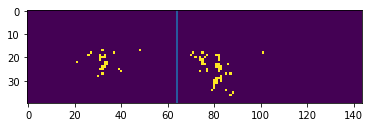

In [10]:
delta = (X[0,:,:,0] - X[10,:,:,0])>0.1
plt.imshow(delta)
avg = (delta.sum(axis=0) * np.arange(144)).sum()/delta.sum()
plt.axvline(avg)

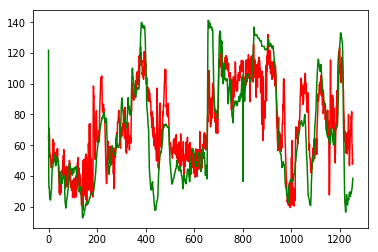

In [14]:
points = []
for i in range(int(len(X)/10)):
    start = i*10
    delta = (X[start,:,:,0] - X[start+10,:,:,0])>0.1
    avg = (delta.sum(axis=0) * np.arange(144)).sum()/delta.sum()
    points.append(avg)

plt.plot(points, c='r')
plt.plot(y[:-10:10, 0]*144, c='g')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(y[:-10:10,0]*144, points)

16.21334456779849

## Experiment with vertically weighted pixel avg

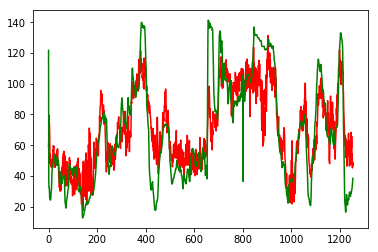

14.030977818868463

In [36]:
points = []
for i in range(int(len(X)/10)):
    start = i*10
    delta = (X[start,:,:,0] - X[start+10,:,:,0])>0.1
    delta = np.multiply(delta,(np.arange(X.shape[1])**3)[::-1].reshape(-1,1))
    avg = (delta.sum(axis=0) * np.arange(144)).sum()/delta.sum()
    points.append(avg)

plt.plot(points, c='r')
plt.plot(y[:-10:10,0]*144, c='g')
plt.show()
mean_absolute_error(y[:-10:10,0]*144, points)

## Experiment with momentum

13.829829901614527

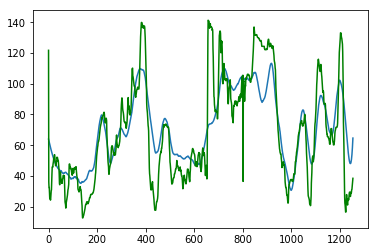

In [50]:
from scipy.signal import savgol_filter
yhat = savgol_filter(points, 101, 4)

plt.plot(yhat)
plt.plot(y[:-10:10,0]*144, c='g')
mean_absolute_error(y[:-10:10,0]*144, yhat)

In [ ]:
previous_point = 0

look_at_me = 0
weight = 1

new_point = 100
new_point_weight = 20


